In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re

import warnings
warnings.filterwarnings("ignore")

In [187]:
Z = pd.read_csv('.\SMSSpamCollection.csv')

In [188]:
Z.head(5)

,target,text
0,ham,Go until jurong point
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf


In [189]:
Z.isnull().sum()

target    0
text      4
dtype: int64

In [190]:
Z["text"].count()

5548

In [191]:
Z.dtypes

target    object
text      object
dtype: object

In [192]:
Z.target.unique()

array(['ham', 'spam', 'target'], dtype=object)

In [193]:
# Целевая переменная
y=Z["target"]

In [194]:
# Смотрим только тексты твитов
X=pd.DataFrame(Z['text'])

In [195]:
X

,text
0,Go until jurong point
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,Nah I don't think he goes to usf
...,...
5547,This is the 2nd time we have tried 2 contact u...
5548,Will ü b going to esplanade fr home?
5549,Pity
5550,The guy did some bitching but I acted like i'd...


# Обработка текстов

In [196]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [197]:
#обычно загрузка происходит один раз скачиваются файлы, далее они остаются на компьютере
#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vladi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vladi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
stop = stopwords.words('russian')
stemmer = nltk.stem.snowball.RussianStemmer('russian')

In [199]:
# Вывод списка стоп слов на русском
print (' '.join(stopwords.words('russian')[:20]))

и в во не что он на я с со как а то все она так его но да ты


In [200]:
# Обертка для визуализции ожидания обработки
import tqdm

In [201]:
# Функция обработки текста 
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    #regex = re.compile('[^а-я А-Я]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
    #for i in  range(len(texts)):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

In [202]:
def stemming_texts(texts):
    st = nltk.stem.snowball.EnglishStemmer('english')
    stem_text = []
    for text in tqdm.tqdm(texts):
        word_tokens = word_tokenize(text)
        stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
    return stem_text

In [203]:
X.isnull().sum()

text    4
dtype: int64

In [204]:
X = X.fillna("s")

In [205]:
X.isnull().sum()

text    0
dtype: int64

In [206]:
X.head()

,text
0,Go until jurong point
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,Nah I don't think he goes to usf


In [207]:
X['text'] = preprocess_text(X['text'])

100%|███████████████████████████████████████████████████████████████████████████| 5552/5552 [00:00<00:00, 10108.91it/s]


In [208]:
X['text'] = stemming_texts(X['text'])

100%|████████████████████████████████████████████████████████████████████████████| 5552/5552 [00:00<00:00, 6342.79it/s]


In [209]:
X.head()

,text
0,go jurong point
1,ok lar joke wif u oni
2,free entri wkli comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say
4,nah think goe usf


In [210]:
#def data_Stemmer(text):
#    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [211]:
#X.ttext = X.ttext.apply(lambda x: x.lower().replace('unknown', ''))

In [212]:
#X.ttext = X.ttext.apply(lambda x: data_Stemmer(x.lower().replace('unknown', '')))

In [213]:
#X.head()

In [214]:
X=X.text

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [241]:
#Разбиваем на тестовую и обучающие выборки
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

In [266]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)

In [267]:
Xtr_tfidf.shape, Xval_tfidf.shape

((3886, 1634), (1666, 1634))

In [265]:
Xtr_tfidf[:,].shape

(3886, 1634)

In [236]:
Xtr_tfidf.shape

()

## Методы логистической регрессии к нашим данным

In [268]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [269]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=500, 
    penalty='l2', 
    random_state=42
)

In [270]:
logit_sgd.fit(Xtr_tfidf, ytr)

print("train accuracy=", accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print("validation accuracy=",accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

train accuracy= 0.9948533196088523
validation accuracy= 0.975390156062425
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1471
        spam       0.87      0.93      0.90       195

    accuracy                           0.98      1666
   macro avg       0.93      0.96      0.94      1666
weighted avg       0.98      0.98      0.98      1666



In [271]:
Xtr_tfidf.shape, ytr.shape

((3886, 1634), (3886,))

In [274]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1, multi_class='ovr')
logit_cv.fit(Xtr_tfidf, ytr)

LogisticRegressionCV(multi_class='ovr', n_jobs=-1)

In [275]:
print("train accuracy=", accuracy_score(logit_cv.predict(Xtr_tfidf), ytr))
print("validation accuracy=", accuracy_score(logit_cv.predict(Xval_tfidf), yval))

print(classification_report(logit_cv.predict(Xval_tfidf), yval))

train accuracy= 0.9948533196088523
validation accuracy= 0.9765906362545018
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1483
        spam       0.84      0.97      0.90       183

    accuracy                           0.98      1666
   macro avg       0.92      0.97      0.94      1666
weighted avg       0.98      0.98      0.98      1666



In [276]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=25):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

In [277]:
logit_cv.coef_

array([[ 4.26628000e-02,  2.54539459e-02,  5.09709469e-02, ...,
         3.22768580e-02,  1.96371243e-01, -3.42469167e-02],
       [-4.17372632e-02, -2.57982180e-02, -5.06842413e-02, ...,
        -3.21032354e-02, -1.94121566e-01,  3.28793166e-02],
       [-9.60808659e-07, -9.61858538e-07, -1.61187767e-06, ...,
        -9.61014291e-07, -4.62326250e-06, -7.88146502e-07]])

In [280]:
tf_vectorizer.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(min_df=0.001, ngram_range=(1, 2), norm=None,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])>

## Графики значимости слов для попадания в разные классы

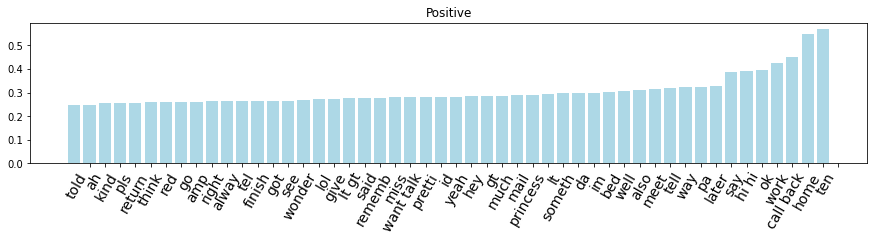

In [281]:
visualize_coefficients(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names(),title="Positive", plot_num=0, n_top_features=50)

In [282]:
def visualize_coefficients_2(coef, feature_names, title, plot_num, n_top_features=50):
    interesting_coefficients = np.argsort(coef)[0:n_top_features]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

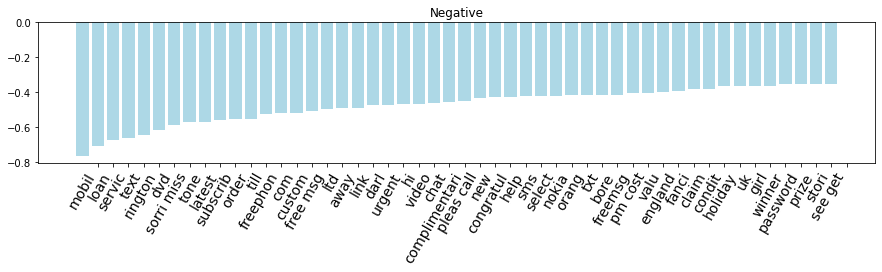

In [283]:
visualize_coefficients_2(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names(),title="Negative", plot_num=1, n_top_features=50)